In [1]:
import os
import sys

seed = 0
os.environ['PYTHONHASSEED'] = str(seed)

In [2]:
import numpy as np
import pandas as pd
import time
import random

from tensorflow.random import set_seed

from sklearn.model_selection import train_test_split

from keras.models import load_model

In [3]:
# Add modules path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from src.data_reader import DataReader
from src.dataset_exploration import unit_cycle_info
from src.filtering import signal_smoothing
from src.metrics import compute_evaluation_metrics
from src.model_evaluation import evaluate_mlp, evaluate_mlp_multiple_splits
from src.plotting import plot_loss_curves
from src.save_object import load_object
from src.training import train_evaluate_mlp, MLPConfigParams

In [5]:
# Set seed
random.seed(seed)
np.random.seed(seed)
set_seed(seed)

In [6]:
# Set input and output paths
filename = '../data/N-CMAPSS_DS02-006.h5'
output_path = '../results/experiment_set_17'

if not os.path.exists(output_path):
    os.makedirs(output_path)

In [7]:
data_reader = DataReader()

start_time = time.process_time()  
data_reader.load_dataset(filename, load_train=True, load_test=True)
print("Operation time (sec): " , (time.process_time() - start_time))

if data_reader.train_set is not None:
    print("Train set shape: " + str(data_reader.train_set.shape))
    
if data_reader.test_set is not None:   
    print("Test set shape: " + str(data_reader.test_set.shape))

Operation time (sec):  3.75
Train set shape: (5263447, 47)
Test set shape: (1253743, 47)


In [8]:
train_set = data_reader.train_set

In [9]:
y_train = train_set['RUL']
x_train = train_set.drop(['RUL'], axis=1)

In [10]:
selected_columns = data_reader.column_names.w_cols + data_reader.column_names.x_s_cols
selected_columns_with_unit = selected_columns + ['unit']
x_train = x_train[selected_columns_with_unit]

In [11]:
x_train = x_train.astype(np.float32)
y_train = y_train.astype(np.float32)

Saved object to file: ../results/experiment_set_17\results_None_0\split_0\scaler.pkl
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2432      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_____________________________________

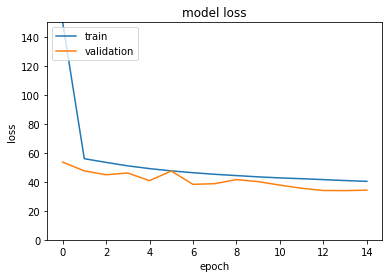

Saved object to file: ../results/experiment_set_17\results_None_0\split_0\history_0.pkl
Test set:
MSE: 33.83
RMSE: 5.82
CMAPSS score: 1.58

Saved object to file: ../results/experiment_set_17\results_None_0\split_1\scaler.pkl
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               2432      
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
___________________________

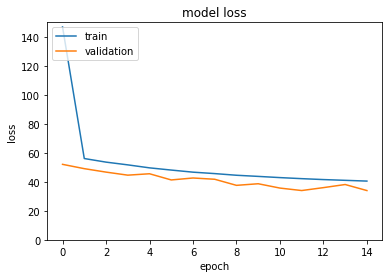

Saved object to file: ../results/experiment_set_17\results_None_0\split_1\history_1.pkl
Test set:
MSE: 33.83
RMSE: 5.82
CMAPSS score: 1.60

Saved object to file: ../results/experiment_set_17\results_None_0\split_2\scaler.pkl
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               2432      
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                16448     
___________________________

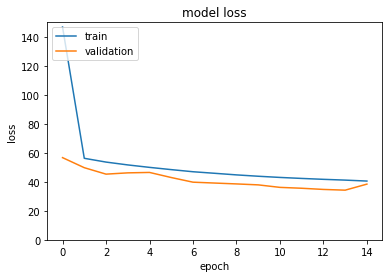

Saved object to file: ../results/experiment_set_17\results_None_0\split_2\history_2.pkl
Test set:
MSE: 33.96
RMSE: 5.83
CMAPSS score: 1.58

MSE: mean = 33.88   stddev = 0.06
RMSE: mean = 5.82   stddev = 0.01
CMAPSS: mean = 1.59   stddev = 0.01
Saved object to file: ../results/experiment_set_17\results_es_0.01\split_0\scaler.pkl
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               2432      
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
______________________________________________________

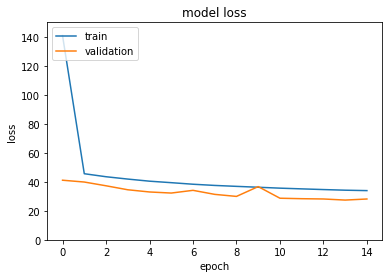

Saved object to file: ../results/experiment_set_17\results_es_0.01\split_0\history_0.pkl
Test set:
MSE: 27.19
RMSE: 5.21
CMAPSS score: 1.46

Saved object to file: ../results/experiment_set_17\results_es_0.01\split_1\scaler.pkl
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               2432      
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                16448     
_________________________

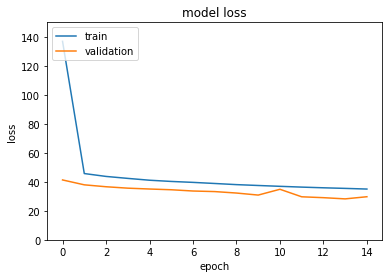

Saved object to file: ../results/experiment_set_17\results_es_0.01\split_1\history_1.pkl
Test set:
MSE: 28.34
RMSE: 5.32
CMAPSS score: 1.50

Saved object to file: ../results/experiment_set_17\results_es_0.01\split_2\scaler.pkl
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               2432      
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                16448     
_________________________

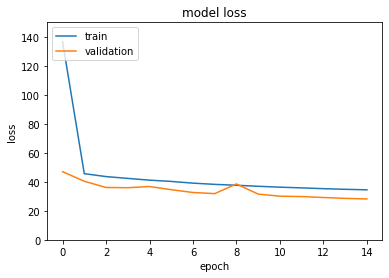

Saved object to file: ../results/experiment_set_17\results_es_0.01\split_2\history_2.pkl
Test set:
MSE: 27.90
RMSE: 5.28
CMAPSS score: 1.47

MSE: mean = 27.81   stddev = 0.47
RMSE: mean = 5.27   stddev = 0.04
CMAPSS: mean = 1.48   stddev = 0.02
Saved object to file: ../results/experiment_set_17\results_es_0.05\split_0\scaler.pkl
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 128)               2432      
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_____________________________________________________

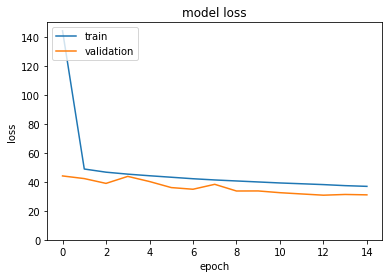

Saved object to file: ../results/experiment_set_17\results_es_0.05\split_0\history_0.pkl
Test set:
MSE: 30.66
RMSE: 5.54
CMAPSS score: 1.53

Saved object to file: ../results/experiment_set_17\results_es_0.05\split_1\scaler.pkl
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 128)               2432      
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                16448     
_________________________

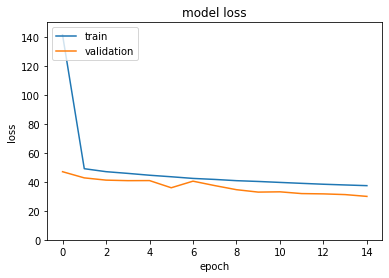

Saved object to file: ../results/experiment_set_17\results_es_0.05\split_1\history_1.pkl
Test set:
MSE: 29.95
RMSE: 5.47
CMAPSS score: 1.51

Saved object to file: ../results/experiment_set_17\results_es_0.05\split_2\scaler.pkl
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 128)               2432      
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_25 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)                16448     
_________________________

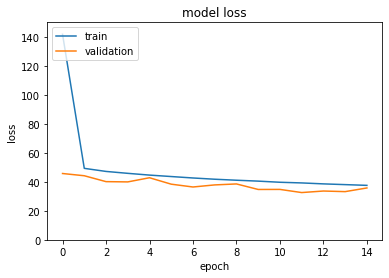

Saved object to file: ../results/experiment_set_17\results_es_0.05\split_2\history_2.pkl
Test set:
MSE: 32.41
RMSE: 5.69
CMAPSS score: 1.56

MSE: mean = 31.01   stddev = 1.03
RMSE: mean = 5.57   stddev = 0.09
CMAPSS: mean = 1.53   stddev = 0.02
Saved object to file: ../results/experiment_set_17\results_es_0.1\split_0\scaler.pkl
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 128)               2432      
_________________________________________________________________
dropout_27 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_28 (Dropout)         (None, 256)               0         
______________________________________________________

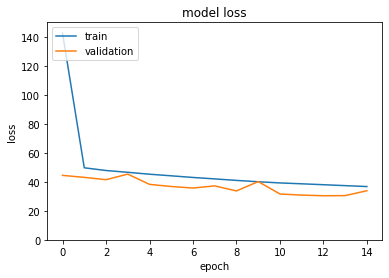

Saved object to file: ../results/experiment_set_17\results_es_0.1\split_0\history_0.pkl
Test set:
MSE: 30.26
RMSE: 5.50
CMAPSS score: 1.53

Saved object to file: ../results/experiment_set_17\results_es_0.1\split_1\scaler.pkl
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 128)               2432      
_________________________________________________________________
dropout_30 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_31 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 64)                16448     
__________________________

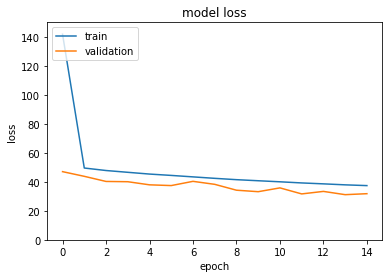

Saved object to file: ../results/experiment_set_17\results_es_0.1\split_1\history_1.pkl
Test set:
MSE: 31.16
RMSE: 5.58
CMAPSS score: 1.53

Saved object to file: ../results/experiment_set_17\results_es_0.1\split_2\scaler.pkl
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 128)               2432      
_________________________________________________________________
dropout_33 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_34 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 64)                16448     
__________________________

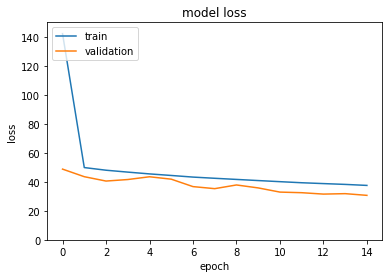

Saved object to file: ../results/experiment_set_17\results_es_0.1\split_2\history_2.pkl
Test set:
MSE: 30.47
RMSE: 5.52
CMAPSS score: 1.53

MSE: mean = 30.63   stddev = 0.38
RMSE: mean = 5.53   stddev = 0.03
CMAPSS: mean = 1.53   stddev = 0.00
Saved object to file: ../results/experiment_set_17\results_es_0.2\split_0\scaler.pkl
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 128)               2432      
_________________________________________________________________
dropout_36 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_37 (Dropout)         (None, 256)               0         
______________________________________________________

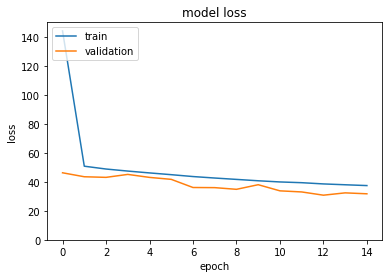

Saved object to file: ../results/experiment_set_17\results_es_0.2\split_0\history_0.pkl
Test set:
MSE: 30.58
RMSE: 5.53
CMAPSS score: 1.53

Saved object to file: ../results/experiment_set_17\results_es_0.2\split_1\scaler.pkl
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 128)               2432      
_________________________________________________________________
dropout_39 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_40 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 64)                16448     
__________________________

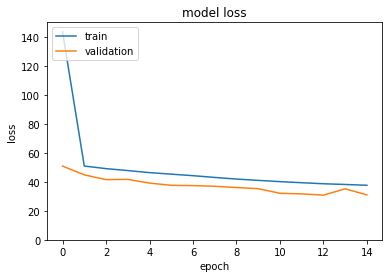

Saved object to file: ../results/experiment_set_17\results_es_0.2\split_1\history_1.pkl
Test set:
MSE: 30.81
RMSE: 5.55
CMAPSS score: 1.51

Saved object to file: ../results/experiment_set_17\results_es_0.2\split_2\scaler.pkl
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 128)               2432      
_________________________________________________________________
dropout_42 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_43 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 64)                16448     
__________________________

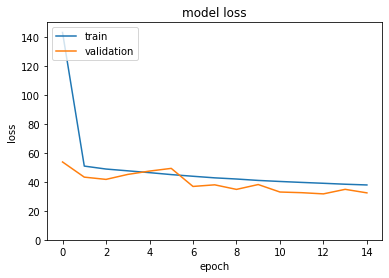

Saved object to file: ../results/experiment_set_17\results_es_0.2\split_2\history_2.pkl
Test set:
MSE: 31.46
RMSE: 5.61
CMAPSS score: 1.54

MSE: mean = 30.95   stddev = 0.37
RMSE: mean = 5.56   stddev = 0.03
CMAPSS: mean = 1.53   stddev = 0.01
Saved object to file: ../results/experiment_set_17\results_es_0.3\split_0\scaler.pkl
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 128)               2432      
_________________________________________________________________
dropout_45 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_46 (Dropout)         (None, 256)               0         
______________________________________________________

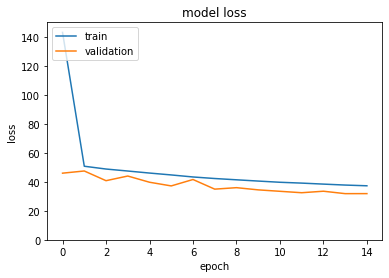

Saved object to file: ../results/experiment_set_17\results_es_0.3\split_0\history_0.pkl
Test set:
MSE: 31.63
RMSE: 5.62
CMAPSS score: 1.53

Saved object to file: ../results/experiment_set_17\results_es_0.3\split_1\scaler.pkl
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 128)               2432      
_________________________________________________________________
dropout_48 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_49 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 64)                16448     
__________________________

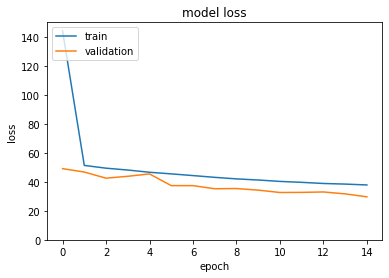

Saved object to file: ../results/experiment_set_17\results_es_0.3\split_1\history_1.pkl
Test set:
MSE: 29.66
RMSE: 5.45
CMAPSS score: 1.52

Saved object to file: ../results/experiment_set_17\results_es_0.3\split_2\scaler.pkl
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 128)               2432      
_________________________________________________________________
dropout_51 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_52 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 64)                16448     
__________________________

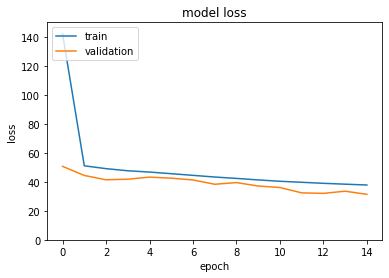

Saved object to file: ../results/experiment_set_17\results_es_0.3\split_2\history_2.pkl
Test set:
MSE: 31.16
RMSE: 5.58
CMAPSS score: 1.53

MSE: mean = 30.82   stddev = 0.84
RMSE: mean = 5.55   stddev = 0.08
CMAPSS: mean = 1.53   stddev = 0.00
Saved object to file: ../results/experiment_set_17\results_ma_5\split_0\scaler.pkl
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 128)               2432      
_________________________________________________________________
dropout_54 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_55 (Dropout)         (None, 256)               0         
________________________________________________________

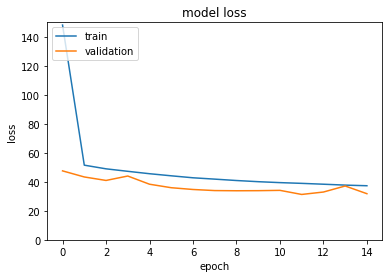

Saved object to file: ../results/experiment_set_17\results_ma_5\split_0\history_0.pkl
Test set:
MSE: 31.17
RMSE: 5.58
CMAPSS score: 1.55

Saved object to file: ../results/experiment_set_17\results_ma_5\split_1\scaler.pkl
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 128)               2432      
_________________________________________________________________
dropout_57 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_58 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 64)                16448     
______________________________

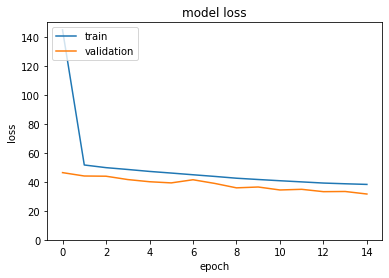

Saved object to file: ../results/experiment_set_17\results_ma_5\split_1\history_1.pkl
Test set:
MSE: 31.61
RMSE: 5.62
CMAPSS score: 1.55

Saved object to file: ../results/experiment_set_17\results_ma_5\split_2\scaler.pkl
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 128)               2432      
_________________________________________________________________
dropout_60 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_61 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 64)                16448     
______________________________

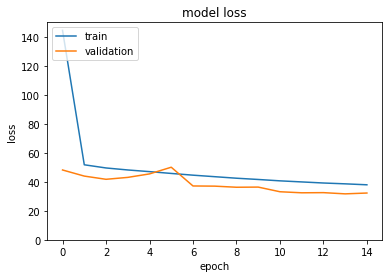

Saved object to file: ../results/experiment_set_17\results_ma_5\split_2\history_2.pkl
Test set:
MSE: 31.46
RMSE: 5.61
CMAPSS score: 1.53

MSE: mean = 31.41   stddev = 0.19
RMSE: mean = 5.60   stddev = 0.02
CMAPSS: mean = 1.54   stddev = 0.01
Saved object to file: ../results/experiment_set_17\results_ma_10\split_0\scaler.pkl
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 128)               2432      
_________________________________________________________________
dropout_63 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_64 (Dropout)         (None, 256)               0         
_________________________________________________________

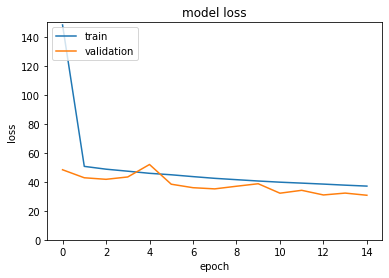

Saved object to file: ../results/experiment_set_17\results_ma_10\split_0\history_0.pkl
Test set:
MSE: 30.58
RMSE: 5.53
CMAPSS score: 1.52

Saved object to file: ../results/experiment_set_17\results_ma_10\split_1\scaler.pkl
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 128)               2432      
_________________________________________________________________
dropout_66 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_67 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 64)                16448     
____________________________

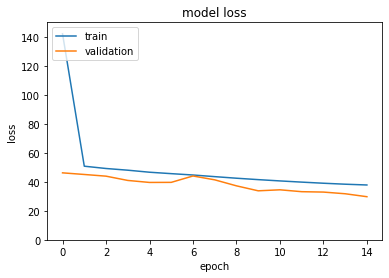

Saved object to file: ../results/experiment_set_17\results_ma_10\split_1\history_1.pkl
Test set:
MSE: 29.82
RMSE: 5.46
CMAPSS score: 1.51

Saved object to file: ../results/experiment_set_17\results_ma_10\split_2\scaler.pkl
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 128)               2432      
_________________________________________________________________
dropout_69 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_93 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_70 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_94 (Dense)             (None, 64)                16448     
____________________________

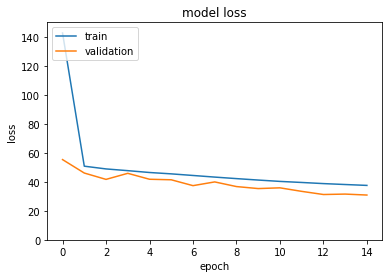

Saved object to file: ../results/experiment_set_17\results_ma_10\split_2\history_2.pkl
Test set:
MSE: 30.73
RMSE: 5.54
CMAPSS score: 1.54

MSE: mean = 30.38   stddev = 0.40
RMSE: mean = 5.51   stddev = 0.04
CMAPSS: mean = 1.52   stddev = 0.01
Saved object to file: ../results/experiment_set_17\results_ma_15\split_0\scaler.pkl
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 128)               2432      
_________________________________________________________________
dropout_72 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_73 (Dropout)         (None, 256)               0         
________________________________________________________

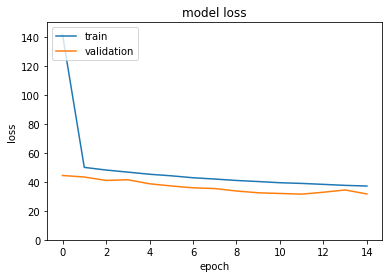

Saved object to file: ../results/experiment_set_17\results_ma_15\split_0\history_0.pkl
Test set:
MSE: 31.41
RMSE: 5.60
CMAPSS score: 1.54

Saved object to file: ../results/experiment_set_17\results_ma_15\split_1\scaler.pkl
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 128)               2432      
_________________________________________________________________
dropout_75 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_101 (Dense)            (None, 256)               33024     
_________________________________________________________________
dropout_76 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_102 (Dense)            (None, 64)                16448     
____________________________

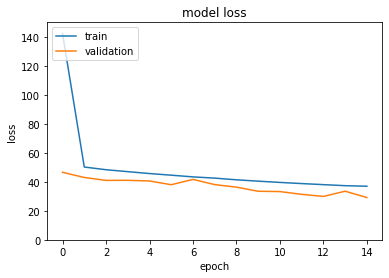

Saved object to file: ../results/experiment_set_17\results_ma_15\split_1\history_1.pkl
Test set:
MSE: 29.22
RMSE: 5.41
CMAPSS score: 1.51

Saved object to file: ../results/experiment_set_17\results_ma_15\split_2\scaler.pkl
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_104 (Dense)            (None, 128)               2432      
_________________________________________________________________
dropout_78 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_105 (Dense)            (None, 256)               33024     
_________________________________________________________________
dropout_79 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_106 (Dense)            (None, 64)                16448     
____________________________

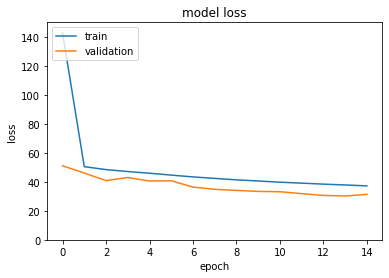

Saved object to file: ../results/experiment_set_17\results_ma_15\split_2\history_2.pkl
Test set:
MSE: 30.11
RMSE: 5.49
CMAPSS score: 1.51

MSE: mean = 30.24   stddev = 0.90
RMSE: mean = 5.50   stddev = 0.08
CMAPSS: mean = 1.52   stddev = 0.01
Saved object to file: ../results/experiment_set_17\results_ma_20\split_0\scaler.pkl
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 128)               2432      
_________________________________________________________________
dropout_81 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_109 (Dense)            (None, 256)               33024     
_________________________________________________________________
dropout_82 (Dropout)         (None, 256)               0         
________________________________________________________

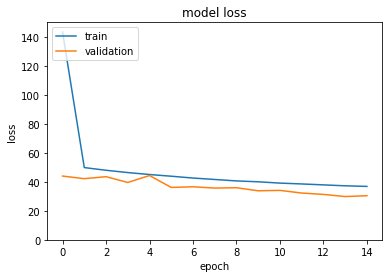

Saved object to file: ../results/experiment_set_17\results_ma_20\split_0\history_0.pkl
Test set:
MSE: 29.72
RMSE: 5.45
CMAPSS score: 1.51

Saved object to file: ../results/experiment_set_17\results_ma_20\split_1\scaler.pkl
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 128)               2432      
_________________________________________________________________
dropout_84 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_113 (Dense)            (None, 256)               33024     
_________________________________________________________________
dropout_85 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_114 (Dense)            (None, 64)                16448     
____________________________

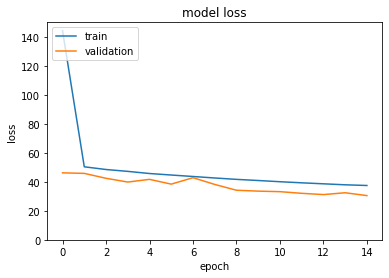

Saved object to file: ../results/experiment_set_17\results_ma_20\split_1\history_1.pkl
Test set:
MSE: 30.54
RMSE: 5.53
CMAPSS score: 1.51

Saved object to file: ../results/experiment_set_17\results_ma_20\split_2\scaler.pkl
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 128)               2432      
_________________________________________________________________
dropout_87 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_117 (Dense)            (None, 256)               33024     
_________________________________________________________________
dropout_88 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_118 (Dense)            (None, 64)                16448     
____________________________

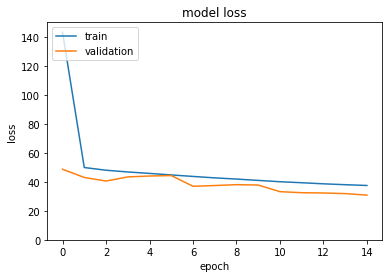

Saved object to file: ../results/experiment_set_17\results_ma_20\split_2\history_2.pkl
Test set:
MSE: 30.68
RMSE: 5.54
CMAPSS score: 1.53

MSE: mean = 30.31   stddev = 0.42
RMSE: mean = 5.51   stddev = 0.04
CMAPSS: mean = 1.52   stddev = 0.01


In [12]:
#########################################
# Effect of smoothing (experiment set 17)
#########################################
NUM_TRIALS = 3
EPOCHS = 15
BATCH_SIZE = 512

mlp_params = MLPConfigParams(layer_sizes=[128, 256, 64], activation='tanh', dropout=0.05)
alpha_vals = [0.01, 0.05, 0.1, 0.2, 0.3]
w_vals = [5, 10, 15, 20]

filter_params = [("None", 0)] + [("es", alpha) for alpha in alpha_vals] + [("ma", w) for w in w_vals]

results_file = os.path.join(output_path, "results_filtering.csv")
with open(results_file, "w") as file:
    file.write("filter_type,filter_param,mse,rmse,cmapss,mse(mean),mse(std),rmse(mean),rmse(std),cmapss(mean),cmapss(std)\n")


for params in filter_params:
    filter_type, filter_param = params
    
    results_folder = f"results_{filter_type}_{filter_param}"
    results_path = os.path.join(output_path, results_folder)
    if not os.path.exists(results_path):
        os.makedirs(results_path)
    
    # Filtering
    if filter_type == "None":
        x_train_filtered = x_train[selected_columns].astype(np.float32)
    else:
        x_train_filtered = signal_smoothing(x_train, selected_columns, filter_type, filter_param)
        x_train_filtered = x_train_filtered[selected_columns].astype(np.float32)
    
    # Validation split
    x_train_filtered, x_holdout_filtered, y_train_filtered, y_holdout_filtered = train_test_split(
        x_train_filtered, 
        y_train, 
        test_size=0.3, 
        random_state=seed)
    
    mse_vals, rmse_vals, cmapss_vals = train_evaluate_mlp(
        x_train_filtered, y_train_filtered, 
        x_holdout_filtered, y_holdout_filtered,
        NUM_TRIALS, 
        mlp_params, 
        results_path, 
        EPOCHS, BATCH_SIZE,
        results_file=results_file)